In [1]:
import pandas as pd

In [54]:
df1 = pd.read_csv('C:\\Users\\stoer\\Downloads\\prison-population-rate.csv')
df2 = pd.read_csv('C:\\Users\\stoer\\Downloads\\the-share-of-people-living-in-extreme-poverty-vs-gdp-per-capita.csv')
df3 = pd.read_csv('C:\\Users\\stoer\\Downloads\\total-government-expenditure-on-education-gdp.csv')

In [27]:
year_2018_data = df2[df2['Year'] == 2018]

In [11]:
merged_df = df1.merge(df2, on='Entity', how='inner')

In [55]:
merged_df = merged_df.merge(df3, on='Entity', how='inner')

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191837 entries, 0 to 1191836
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   Entity                                                 1191837 non-null  object 
 1   Code_x                                                 1191837 non-null  object 
 2   Year_x                                                 1191837 non-null  int64  
 3   Prison population rate (World Prison Brief 2018)       1191837 non-null  int64  
 4   Code_y                                                 1191837 non-null  object 
 5   Year_y                                                 1191837 non-null  int64  
 6   $2.15 a day - share of population below poverty line   52532 non-null    float64
 7   GDP per capita, PPP (constant 2017 international $)    142316 non-null   float64
 8   Population (historical

In [14]:
correlation = merged_df['$2.15 a day - share of population below poverty line'].corr(
    merged_df['Prison population rate (World Prison Brief 2018)']
)

print(f'Correlation between the two columns: {correlation}')

Correlation between the two columns: -0.16813000673779877


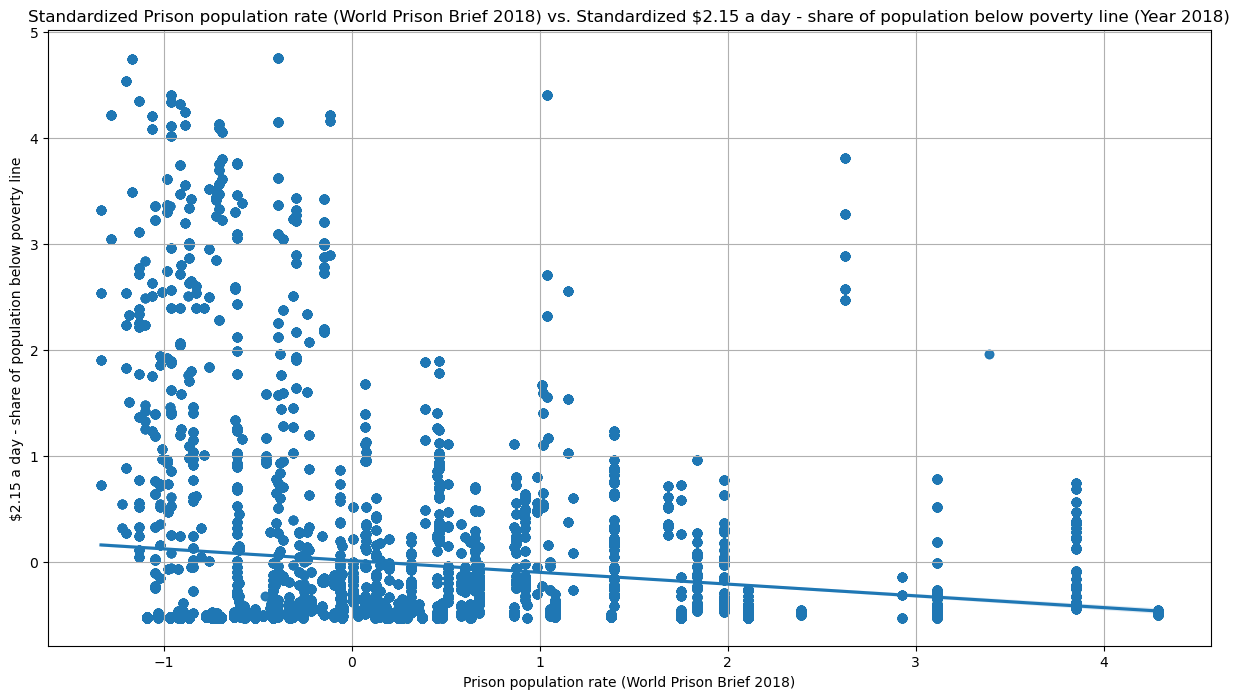

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Filter the data for the year 2018
merged_df_2018 = merged_df[merged_df['Year_x'] == 2018]

# Select the three columns of interest
x_column = "Prison population rate (World Prison Brief 2018)"
y_column = "$2.15 a day - share of population below poverty line"

# Select the data for the two columns of interest
data_to_scale = merged_df_2018[[x_column, y_column]]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the entire dataset
scaled_data = scaler.fit_transform(data_to_scale)

# Create a scatter plot with regression line for the standardized data
plt.figure(figsize=(15, 8))
sns.regplot(x=scaled_data[:, 0], y=scaled_data[:, 1])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Standardized {x_column} vs. Standardized {y_column} (Year 2018)')
plt.grid(True)
plt.show()